<a href="https://colab.research.google.com/github/rudroahmed/Data_Minning/blob/main/Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data.head()


Mounted at /content/drive


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
for row in data:
  print(row)

Sample code
Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses
Class


In [ ]:
data = data.drop(['Sample code'],axis=1)
data= data.replace('?',np.nan)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [ ]:
# Convert 'Bare Nuclei' column to numeric before filling NaN
data2 = pd.to_numeric(data['Bare Nuclei'], errors='coerce') # errors='coerce' will replace invalid values with NaN

print('Before replacing missing values:')
print(data2[20:25])

data2 = data2.fillna(data2.median()) # inplace=False will return a copy of the data`

print('\nAfter replacing missing values:')
print(data2[20:25])
data2.isna().sum()


Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


np.int64(0)

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


<Axes: >

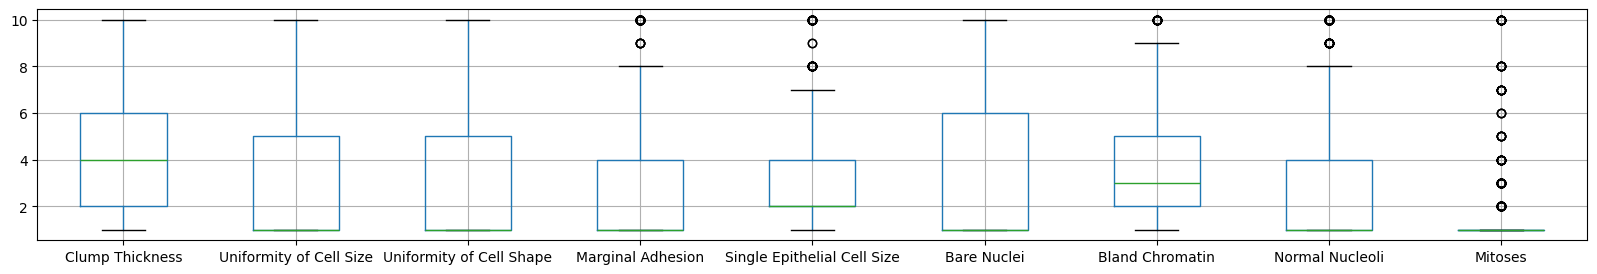

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[222:250]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
222,-0.148359,-0.699494,-0.742767,0.067638,-1.000778,0.399397,-0.589645,-0.611387,-0.343666
223,0.917080,0.611354,0.939651,0.067638,-0.097558,1.222700,1.460910,0.371049,-0.343666
224,1.982519,0.611354,0.603167,1.118287,-0.097558,1.771569,1.460910,2.008442,0.239398
225,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
226,1.982519,0.611354,1.276135,0.417854,0.354052,1.771569,1.871021,2.008442,-0.343666
227,1.272227,1.922202,1.949102,0.768071,-0.097558,0.399397,1.460910,1.353485,-0.343666
228,-1.213798,-0.699494,-0.742767,-0.632794,-1.000778,-0.698341,-0.179534,-0.611387,-0.343666
229,1.982519,2.249915,2.285586,0.067638,3.063712,1.771569,2.281132,2.335921,-0.343666
230,0.917080,0.283642,1.276135,0.417854,-0.097558,0.948266,1.460910,1.026006,-0.343666
231,0.561934,1.594490,1.276135,0.768071,1.257272,1.222700,1.871021,2.008442,0.239398


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

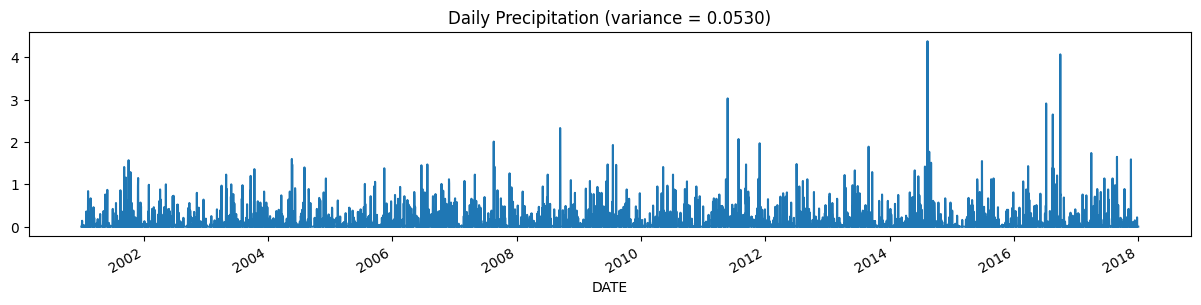

In [ ]:
import pandas as pd
import os
path = '/content/DTW_prec.csv' # Replace [Correct_Folder] with the actual folder name
daily = pd.read_csv(path)
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

daily.describe()
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

<ipython-input-24-5ae1711a1e83>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily.groupby(pd.Grouper(freq='M')).sum()


Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

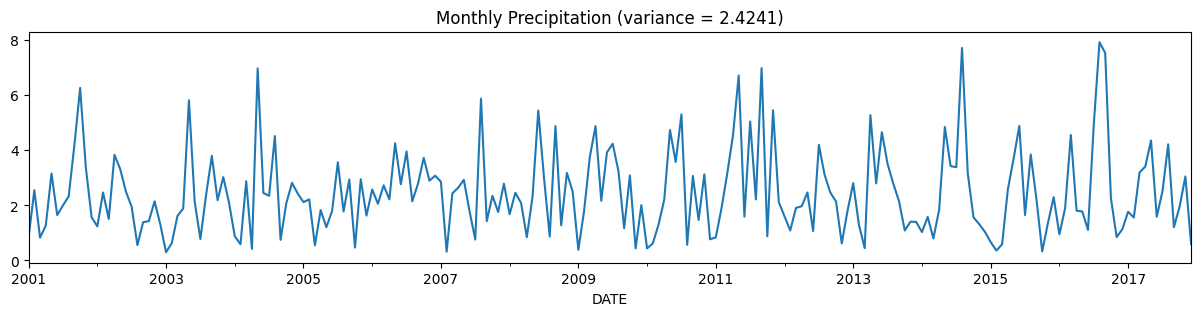

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

<ipython-input-25-46ed05734b2b>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = daily.groupby(pd.Grouper(freq='Y')).sum()


Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

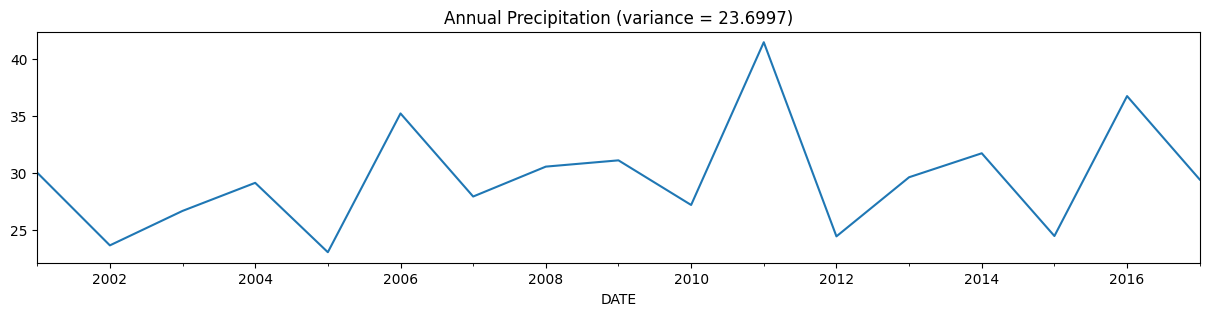

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = '/content/drive/MyDrive/DM Dataset/pics-20250501T181412Z-001.zip'
# Directory where you want to extract the contents
extract_to = '/content/drive/MyDrive/DM Dataset'

# Make sure the output folder exists
os.makedirs(extract_to, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped successfully!")

Unzipped successfully!


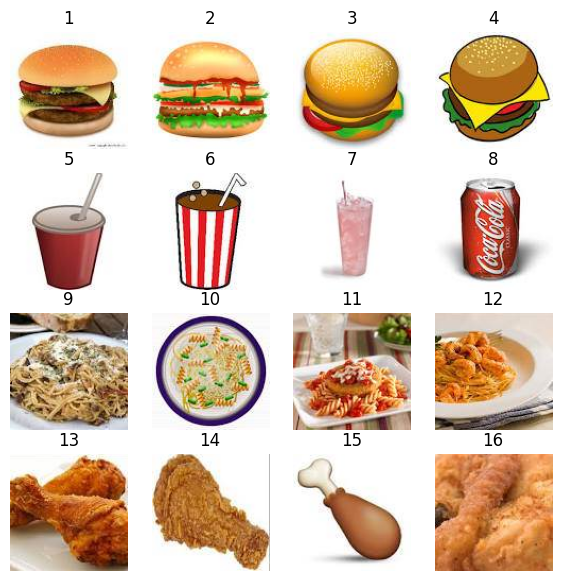

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    path='/content/drive/MyDrive/DM Dataset/pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(path)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,1592.889581,-6651.319567,burger
2,513.009817,-6333.440702,burger
3,-963.275093,-7209.377914,burger
4,-2165.064089,-9039.300745,burger
5,7842.473881,1064.316697,drink
6,8458.900463,5385.757354,drink
7,11181.804185,5359.310854,drink
8,6831.007478,-1129.660050,drink
9,-7639.868360,5060.123270,pasta
10,704.461617,532.044207,pasta


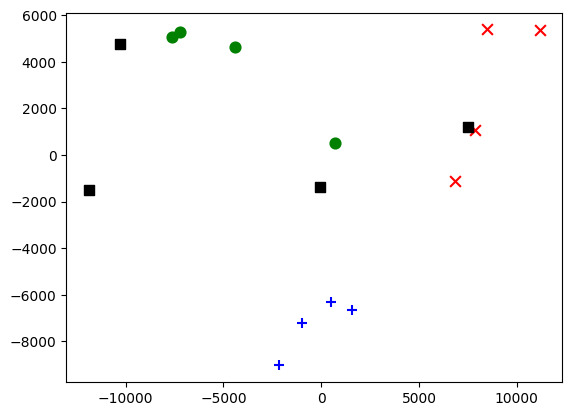

In [ ]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

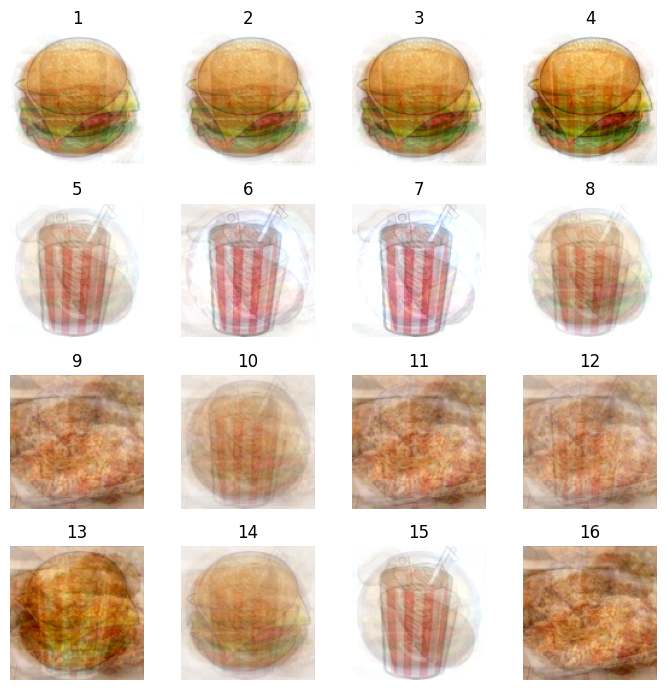

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Assuming 'pca', 'projected', and 'imgData' are defined in previous cells

# Reconstruct the images from the principal components
reconstructed_image_data = pca.inverse_transform(projected[['pc1', 'pc2']])

# Create a figure and a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(7, 7))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through reconstructed images and display in subplots
for i in range(reconstructed_image_data.shape[0]):
    # Reshape the image data to the original image dimensions
    # Replace (111, 111, 3) with the actual dimensions of your images if different
    # Convert the pandas Series to a NumPy array before reshaping
    image = reconstructed_image_data.iloc[i].values.reshape(111, 111, 3)

    # Clip pixel values to the valid range (0-255) and convert to uint8
    image = np.clip(image, 0, 255).astype(np.uint8)

    # Display the image in the current subplot
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(str(i + 1))  # Set the subplot title

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all subplots
plt.show()

,count
Clump Thickness,
5,130
3,108
6,34
4,80
8,46
1,145
2,50
7,23
10,69


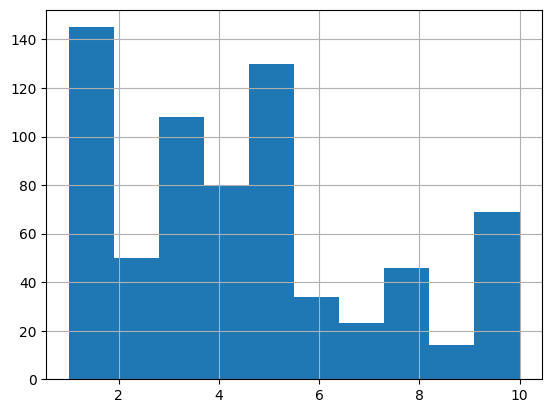

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.991, 3.25]",303
"(3.25, 5.5]",210
"(5.5, 7.75]",57
"(7.75, 10.0]",129


In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.999, 2.0]",195
"(2.0, 4.0]",188
"(4.0, 6.0]",164
"(6.0, 10.0]",152


In [ ]:
sample = data.sample(n=3)
sample

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
345,826923,1,1,1,1,2,1,1,1,1,2
123,1174428,5,3,5,1,8,10,5,3,1,4
435,1294562,10,8,10,1,3,10,5,1,1,4


In [ ]:
sample = data.sample(frac=0.01, replace=False, random_state=1)
sample

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,1217717,5,1,1,6,3,1,1,1,1,2
417,1239967,1,1,1,1,2,1,2,1,1,2
606,353098,4,1,1,2,2,1,1,1,1,2
349,832567,4,2,3,5,3,8,7,6,1,4
134,1180831,3,1,1,1,3,1,2,1,1,2
502,1253917,4,1,1,2,2,1,2,1,1,2
117,1173509,4,5,5,10,4,10,7,5,8,4


In [ ]:
sample = data.sample(frac=0.15, replace=False, random_state=1)
sample

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,1217717,5,1,1,6,3,1,1,1,1,2
417,1239967,1,1,1,1,2,1,2,1,1,2
606,353098,4,1,1,2,2,1,1,1,1,2
349,832567,4,2,3,5,3,8,7,6,1,4
134,1180831,3,1,1,1,3,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
538,1135090,4,1,1,1,2,1,2,1,1,2
553,1306339,4,4,2,1,2,5,2,1,2,2
50,1108370,9,5,8,1,2,3,2,1,5,4
600,1336798,3,1,1,1,2,1,2,1,1,2


In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,1081791,6,2,1,1,1,1,7,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
72,1124651,1,3,3,2,2,1,7,2,1,2
645,1303489,3,1,1,1,2,1,2,1,1,2
144,1184241,2,1,1,1,2,1,2,1,1,2
129,1177512,1,1,1,1,10,1,1,1,1,2
583,1115762,3,1,1,1,2,1,1,1,1,2


In [ ]:
sample = data.sample(frac=0.15, replace=True, random_state=1)
sample

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,1081791,6,2,1,1,1,1,7,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
72,1124651,1,3,3,2,2,1,7,2,1,2
645,1303489,3,1,1,1,2,1,2,1,1,2
144,1184241,2,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
43,1102573,5,6,5,6,10,1,3,1,1,4
532,869828,1,1,1,1,1,1,3,1,1,2
542,1174841,5,3,1,1,2,1,1,1,1,2
548,1240603,3,1,1,1,1,1,1,1,1,2
